<a href="https://colab.research.google.com/github/sgami444/Data-mining/blob/main/Fuzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import operator
import random
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
Dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CombinedData.csv')
streams_df = Dataframe.copy(deep=True)
streams = streams_df["streams"]
new_df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Edited/new_data.pkl")
final_df = new_df.drop([5609, 9391])
final_df = final_df.drop('track_url', axis = 1)


In [ ]:
from sklearn.decomposition import PCA
final_df["streams"] = streams

In [ ]:
country_int = []
count = 0
country_int.append(count)
for i in range(1, len(final_df["country"])):
  if i==5609 or i==5610 or i == 9391 or i==9392:
    country_int.append(count)
    continue
  if final_df["country"][i]==final_df["country"][i-1]:
    country_int.append(count)
  else:
    count = count + 1
    country_int.append(count)

final_df["country_int"] = country_int

In [ ]:
z_norm_data = final_df.copy()
for column in z_norm_data.columns[1:]:
  z_norm_data[column] = (z_norm_data[column] - z_norm_data[column].mean()) / z_norm_data[column].std()

In [ ]:
#try different attributes in PCA and then run through clustering algorithm to see changes
pca_norm_data = PCA(n_components=3)
norm_pca_components = pca_norm_data.fit_transform(z_norm_data[["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence"]])

In [ ]:
data_for_clustering = z_norm_data[:]

In [ ]:
data_for_clustering = data_for_clustering.drop(axis=1, labels='key')

In [ ]:
data_for_clustering = data_for_clustering.drop(axis=1, labels='streams')

In [ ]:
#data_for_clustering = data_for_clustering.drop(axis=1, labels='streams')

In [ ]:
z_norm_data

country  acousticness  ...    streams  country_int
0      United States     -0.979658  ...  22.299621    -1.699635
1      United States     -0.915916  ...  18.859708    -1.699635
2      United States     -1.064180  ...  17.737884    -1.699635
3      United States     -0.816762  ...  17.110052    -1.699635
4      United States      0.664650  ...  14.738718    -1.699635
...              ...           ...  ...        ...          ...
12809       Viet Nam      1.762430  ...  -0.421747     1.671149
12810       Viet Nam      0.574152  ...  -0.421900     1.671149
12811       Viet Nam     -0.126223  ...  -0.422219     1.671149
12812       Viet Nam      1.219442  ...  -0.422414     1.671149
12813       Viet Nam      2.372308  ...  -0.422469     1.671149

[12812 rows x 13 columns]

In [ ]:
columns = list(data_for_clustering.columns)
features = ['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'valence'
 ]
country_names = list(z_norm_data["country"])
df = z_norm_data[features]

number_of_attributes = len(df.columns)

In [ ]:
#speechiness and tempo is the issue, dont use that right now

In [ ]:
df

acousticness  danceability    energy  ...  liveness  loudness   valence
0         -0.979658      0.418202  0.300179  ... -0.970033 -0.450657  1.565696
1         -0.915916     -0.677238  0.739623  ... -0.504936  0.329842 -0.249925
2         -1.064180      0.870983 -0.265680  ...  1.342022  0.104800 -0.894602
3         -0.816762      1.206918 -1.307102  ... -0.669483 -1.342657 -1.675232
4          0.664650      0.564260 -0.699104  ... -0.596444 -0.248487 -0.017491
...             ...           ...       ...  ...       ...       ...       ...
12809      1.762430      0.067661  0.137645  ... -0.446169 -0.562974 -0.026262
12810      0.574152     -0.180639  0.950316  ... -0.897834  1.406040  1.083285
12811     -0.126223      0.754136  0.065408  ... -0.513331 -0.199885 -0.618312
12812      1.219442      1.031648  0.065408  ... -0.588049  1.269627  1.736733
12813      2.372308     -2.094006 -1.403418  ... -0.093568 -1.007340 -1.355086

[12812 rows x 7 columns]

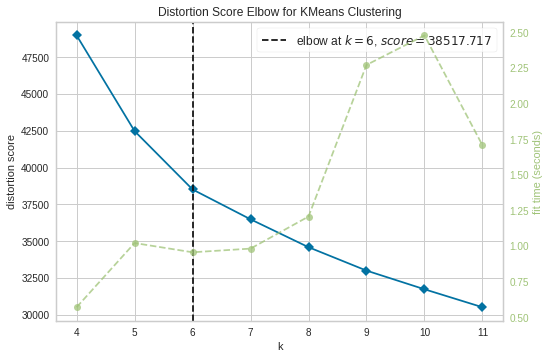

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(df)        
visualizer.show() 

In [ ]:
#change here to change number of clusters
clusters = 7

In [ ]:
#number of iterations
max_iterations = 100

In [ ]:
#total number of data points
n = len(df)

In [ ]:
#Fuzzy parameter
m = 2.00

In [ ]:
#Should we keep the random numbers in the given algo the same everytime or its fine if it is random?

In [ ]:
def initial_members():
  membership = []
  for i in range(n):
    random_numbers = [random.random() for i in range(clusters)]
    temp_cluster_value = [x/sum(random_numbers) for x in random_numbers]
    membership.append(temp_cluster_value)
  return membership

In [ ]:
def getting_clusters(membership):
  clust_labels = []
  for i in range(n):
    maximum_val, id_x = max((val, id_x) for (id_x, val) in enumerate(membership[i]))
    clust_labels.append(id_x)
  return clust_labels

In [ ]:
def cluster_center(membership):
  cluster_value = list(zip(*membership))
  centers = []
  for i in range(clusters):
    x = cluster_value[i]
    x_power_list = [e ** m for e in x]
    denom = sum(x_power_list)
    temp_list = []
    for j in range(n):
      data_point = list(df.iloc[j])
      product = [x_power_list[j] * val for val in data_point]
      temp_list.append(product)
    numer = map(sum, zip(*temp_list))
    center = [z/denom for z in numer]
    centers.append(center)
  return centers

In [ ]:
def update_members_val(membership, centers):
  p = float(2/(m-1))
  for i in range(n):
    x = list(df.iloc[i])
    dist = [np.linalg.norm(list(map(operator.sub, x, centers[q]))) for q in range(clusters)]
    for j in range(clusters):
      dens = sum([math.pow(float(dist[j]/dist[r]), p) for r in range(clusters)])
      membership[i][j] = float(1/dens)
  return membership

In [ ]:
def fuzzy_c_means():
  membership = initial_members()
  iterations = 0
  while iterations <= max_iterations:
    print("Iteration number - " + str(iterations))
    centers = cluster_center(membership)
    membership = update_members_val(membership, centers)
    clust_labels = getting_clusters(membership)
    iterations = iterations + 1
  
  return clust_labels, centers, membership

In [ ]:
labels, centers, final_membership_matrix = fuzzy_c_means()


Iteration number - 0
Iteration number - 1
Iteration number - 2
Iteration number - 3
Iteration number - 4
Iteration number - 5
Iteration number - 6
Iteration number - 7
Iteration number - 8
Iteration number - 9
Iteration number - 10
Iteration number - 11
Iteration number - 12
Iteration number - 13
Iteration number - 14
Iteration number - 15
Iteration number - 16
Iteration number - 17
Iteration number - 18
Iteration number - 19
Iteration number - 20
Iteration number - 21
Iteration number - 22
Iteration number - 23
Iteration number - 24
Iteration number - 25
Iteration number - 26
Iteration number - 27
Iteration number - 28
Iteration number - 29
Iteration number - 30
Iteration number - 31
Iteration number - 32
Iteration number - 33
Iteration number - 34
Iteration number - 35
Iteration number - 36
Iteration number - 37
Iteration number - 38
Iteration number - 39
Iteration number - 40
Iteration number - 41
Iteration number - 42
Iteration number - 43
Iteration number - 44
Iteration number - 4

In [ ]:
#for 'k' clusters - 
clust_nums = []
for _ in range(clusters):
  clust_nums.append(str(_))

In [ ]:
#for three clusters we have columns as 0, 1 and 2 but for more clusters we will have to make the columns equal to the number of clusters
mat_df = pd.DataFrame(final_membership_matrix, columns=clust_nums)

In [ ]:
df_1 = []
for i in range(len(labels)-1):
  if labels[i]==0:
    df_1.append(final_df.country[i])
df_2 = []
for i in range(len(labels)-1):
  if labels[i]==1:
    df_2.append(final_df.country[i])
df_3 = []
for i in range(len(labels)-1):
  if labels[i]==1:
    df_3.append(final_df.country[i])
df_4 = []
for i in range(len(labels)-1):
  if labels[i]==0:
    df_4.append(final_df.country[i])
df_5 = []
for i in range(len(labels)-1):
  if labels[i]==1:
    df_5.append(final_df.country[i])
df_6 = []
for i in range(len(labels)-1):
  if labels[i]==1:
    df_6.append(final_df.country[i])
df_7 = []
for i in range(len(labels)-1):
  if labels[i]==1:
    df_7.append(final_df.country[i])


In [ ]:
import matplotlib.pyplot as plt


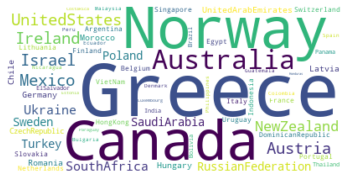

In [ ]:
from wordcloud import WordCloud
text = " ".join([x.replace(" ","") for x in df_1])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

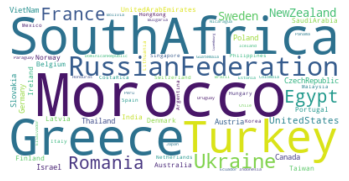

In [ ]:
text = " ".join([x.replace(" ","") for x in df_2])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

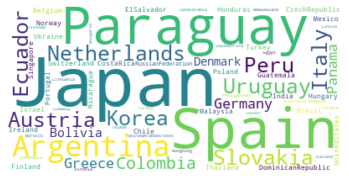

In [ ]:
text = " ".join([x.replace(" ","") for x in df_3])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

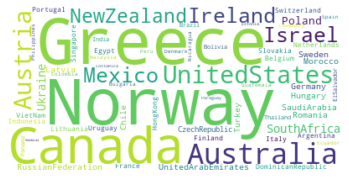

In [ ]:
text = " ".join([x.replace(" ","") for x in df_4])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

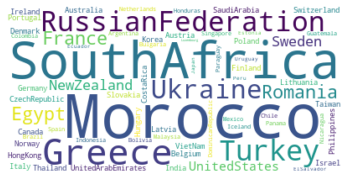

In [ ]:
text = " ".join([x.replace(" ","") for x in df_5])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

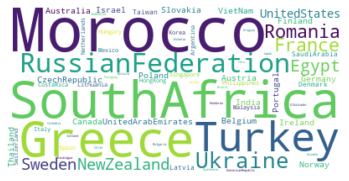

In [ ]:
text = " ".join([x.replace(" ","") for x in df_6])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

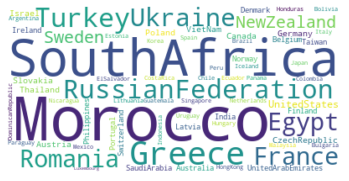

In [ ]:
text = " ".join([x.replace(" ","") for x in df_7])
word_cloud = WordCloud(collocations=False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

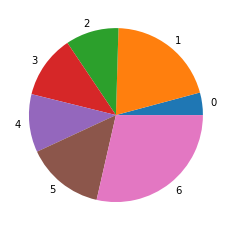

In [ ]:
#initialising count for pie chart
count = []
for _ in range(clusters):
  count.append(0)

for i in labels:
  count[i] = count[i] + 1
  labels_of_pi = '0', '1', '2', '3', '4', '5', '6'
plt.pie(count, labels=labels_of_pi)
plt.show()

In [ ]:
pca = PCA(n_components=2)

components = pca.fit_transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness", "valence"]])


fig = px.scatter(components, x=0, y=1, color = labels)
fig.show()

In [ ]:
fig = px.scatter(components, x=0, y=1, color = final_df["country"])
fig.show()

In [ ]:
pca3d = PCA(n_components=3)
components3d = pca3d.fit_transform(df[["acousticness", "danceability", "energy", "instrumentalness", "liveness","loudness", "valence"]])

total_var = pca3d.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components3d, x=0, y=1, z=2, color = labels, title = f'Total Explained Variance: {total_var:.2f}%', labels = {'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

In [ ]:
center_points = pd.DataFrame(centers, columns = ["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness", "valence"])

In [ ]:
center_points[0:1]

acousticness  danceability   energy  ...  liveness  loudness   valence
0      0.020154     -0.038882 -0.19427  ...  0.028771  -0.22105 -0.252679

[1 rows x 7 columns]

In [ ]:
center_components = pca.transform(center_points[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness", "valence"]])

In [ ]:
center_components

array([[ 3.36632146e-01,  2.10314445e-02],
       [ 4.69114810e-01, -4.56972117e-03],
       [-7.91496400e-01,  2.79619750e-03],
       [ 5.52163724e-02,  7.08139914e-02],
       [-6.00495143e-01,  7.14717618e-02],
       [ 2.97743862e+00, -8.28640727e-02],
       [-1.29108568e+00, -2.99258605e-01]])

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['0'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['1'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['2'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['3'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['4'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['5'])
fig.show()

In [ ]:
components = pca.transform(df[["acousticness", "danceability",	"energy",	"instrumentalness",	"liveness", "loudness",	"valence"]])

fig = px.scatter(components, x=0, y=1, color = mat_df['6'])
fig.show()

In [ ]:
silhouette_score(df, labels, metric='euclidean', sample_size=None, random_state=None)

0.07480961663740285